In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from peak_resolver.linear_combination_fitting import *
import matplotlib.pyplot as plt

In [3]:
# Example usage with a tuple of three vectors
x = np.linspace(0,100,1000)
x2 = x**2# + 0.001 * np.random.rand(x.shape[0])
x3 = x**3 #+ 0.001*np.random.rand(x.shape[0])
x4 = 0.6*np.ones_like(x)


target = np.ones_like(x)

basis = (x2, x3, x4)

result = lin_combination_fitting(target, basis, 
                                 # initial_guess=[1,1,1],
                                 bounds=[[0,2],[0,2],[0,2]], 
                                 method='Nelder-Mead',)                                )
p = result['p']
print("Optimized parameters:", result["p"])
print("Minimized residuals:", result["r"])

Optimized parameters: [0.         0.         1.66666275]
Minimized residuals: 7.439331377192221e-05


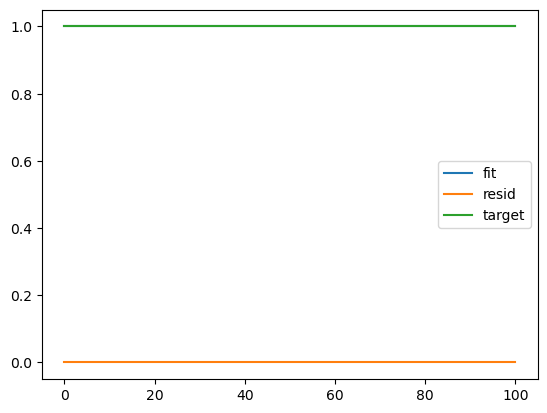

In [7]:
fit = np.zeros_like(x)
for c, f in zip(p, basis):
    fit += c * f
plt.plot(x,fit, label = 'fit')
plt.plot(x, target-fit, label='resid')
plt.plot(x, target, label='target')
plt.legend()